Number of results included: 5000
Results ommited due to invalid format: 0
gpt-3.5-turbo_ASAP.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)

Number of results included: 5000
Results ommited due to invalid format: 0


/tmp/ipykernel_3050133/991709367.py:37: RuntimeWarning: invalid value encountered in scalar power
  avg_logits = [np.prod(log_probs) ** (1 / len(log_probs)) if len(log_probs) > 0 else float('nan') for log_probs in log_probs_list]


gpt-3.5-turbo_BM25.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)

Number of results included: 4470
Results ommited due to invalid format: 529
CodeLlama-70b-hf_ASAP.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)

Number of results included: 4860
Results ommited due to invalid format: 139
CodeLlama-70b-hf_BM25.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)

Number of results included: 4868
Results ommited due to invalid format: 113
deepseek-coder-33b-instruct_ASAP.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)

Number of results included: 4974
Results ommited due to invalid format: 13
deepseek-coder-33b-instruct_BM25.txt
Correlation: SignificanceResult(statistic=nan, pvalue=nan)



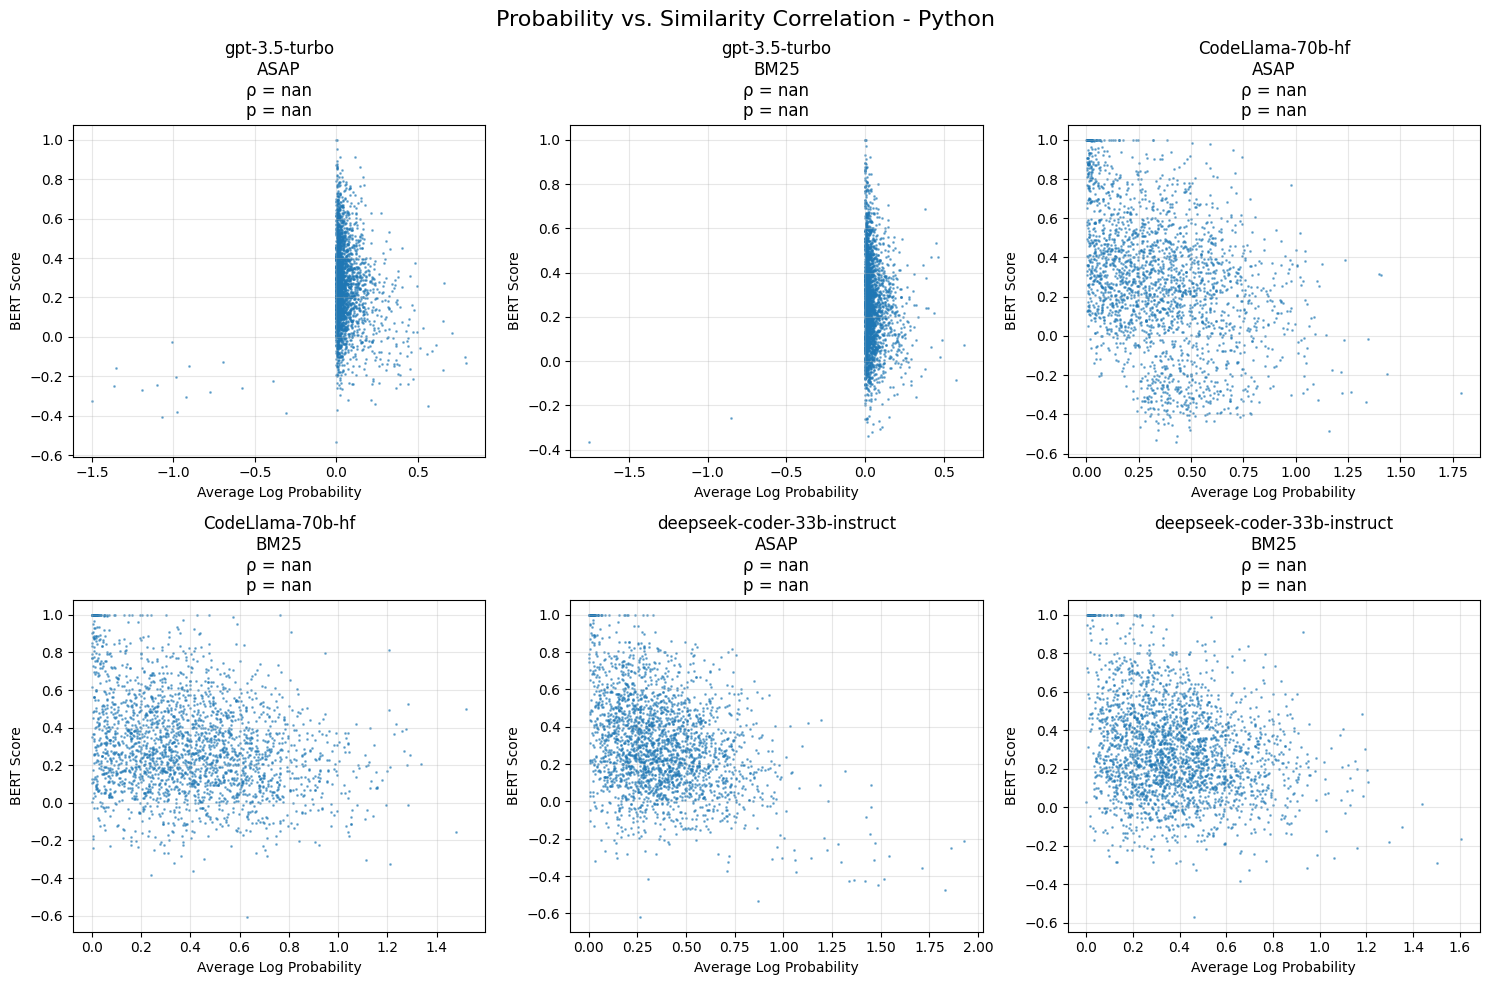

In [3]:
import json
import os
from data_utils import parse_bleu_scores, extract_results
import numpy as np
import scipy
import matplotlib.pyplot as plt

metric_correlations = {} # language -> model_name -> {metric: score}
for language in ["Python"]:
    metric_correlations[language] = {}
    gold_file_path = f"./data/{language}/prompting_data/gold.txt"
    results_dir = f"./data/{language}/model_outputs/"
    metric_paths = {
        "BERT Score": f"./data/{language}/metrics_results/bert-score-recall/",
    }

    model_files = ["gpt-3.5-turbo_ASAP.txt", "gpt-3.5-turbo_BM25.txt", "CodeLlama-70b-hf_ASAP.txt", "CodeLlama-70b-hf_BM25.txt", "deepseek-coder-33b-instruct_ASAP.txt", "deepseek-coder-33b-instruct_BM25.txt"]
    
    # Create subplots for all models
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Probability vs. Similarity Correlation - {language}', fontsize=16)
    axes = axes.flatten()
    
    for idx, model_filename in enumerate(model_files):
        model_name = model_filename[:-9]
        prompting_method = model_filename[-8:-4]
        if model_name not in metric_correlations[language]: metric_correlations[language][model_name] = {}
        metric_correlations[language][model_name][prompting_method] = {}
        for metric, metric_path in metric_paths.items():
            metric_correlations[language][model_name][prompting_method][metric] = {"Avg Logit": {}, "Sequence Logit": {}}
            results_path = os.path.join(results_dir, model_filename)
            if (model_filename == "gpt-3.5-turbo_ASAP.txt" or model_filename == "gpt-3.5-turbo_BM25.txt") and language == "Java":
                model_results, invalid_results = extract_results(results_path, probs=False)
            else:
                model_results, invalid_results = extract_results(results_path, probs=True)
            log_probs_list = [result['log_probs'] for result in model_results.values()]
            avg_logits = [np.prod(log_probs) ** (1 / len(log_probs)) if len(log_probs) > 0 else float('nan') for log_probs in log_probs_list]
            model_metric_path = os.path.join(metric_path, model_filename)
            model_metric_scores = parse_bleu_scores(model_metric_path)
            length = min(5000, len(model_metric_scores))
            
            # Calculate correlation
            correlation_result = scipy.stats.spearmanr(avg_logits[:length], model_metric_scores[:length])
            print(f"{model_filename}")
            print(f"Correlation: {correlation_result}\n")
            
            # Create scatterplot
            ax = axes[idx]
            
            # Filter out nan values for plotting
            valid_indices = [i for i in range(length) if not (np.isnan(avg_logits[i]) or np.isnan(model_metric_scores[i]))]
            valid_probs = [avg_logits[i] for i in valid_indices]
            valid_scores = [model_metric_scores[i] for i in valid_indices]
            
            if valid_probs and valid_scores:
                ax.scatter(valid_probs, valid_scores, alpha=0.5, s=1)
                ax.set_xlabel('Average Log Probability')
                ax.set_ylabel('BERT Score')
                ax.set_title(f'{model_name}\n{prompting_method}\nρ = {correlation_result.statistic:.3f}\np = {correlation_result.pvalue:.3f}')
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{model_name}\n{prompting_method}\nNo valid data')
    
    plt.tight_layout()
    plt.show()

Number of results included: 4860
Results ommited due to invalid format: 139
CodeLlama-70b BM25 Analysis:
  Spearman correlation: nan
  P-value: nan
  Valid data points: 2498
  Results omitted due to invalid format: 2362


/tmp/ipykernel_3050133/2091856869.py:18: RuntimeWarning: invalid value encountered in scalar power
  avg_logits = [np.prod(log_probs) ** (1 / len(log_probs)) if len(log_probs) > 0 else float('nan') for log_probs in log_probs_list]


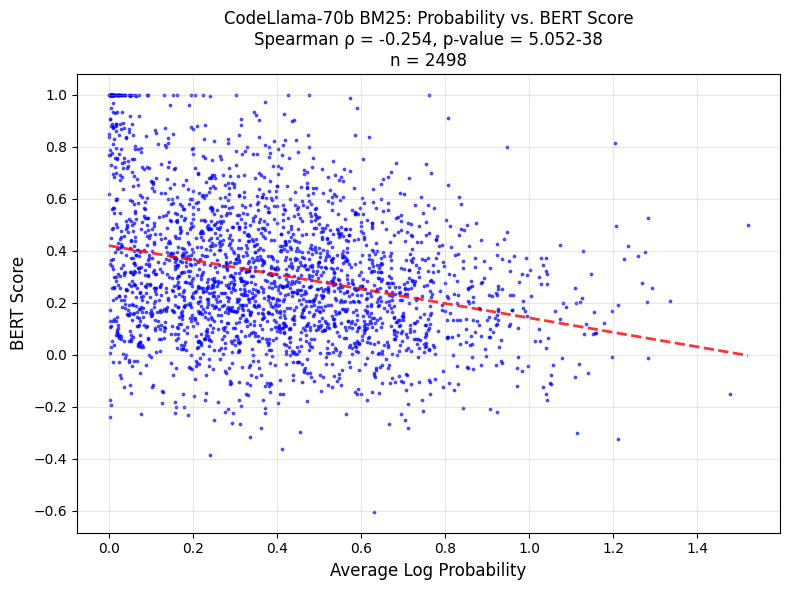

In [4]:
# CodeLlama-70b BM25 analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

language = "Python"
results_dir = f"./data/{language}/model_outputs/"
metric_path = f"./data/{language}/metrics_results/bert-score-recall/"

# Focus on CodeLlama-70b BM25 only
model_filename = "CodeLlama-70b-hf_BM25.txt"

# Extract model results and probabilities
results_path = os.path.join(results_dir, model_filename)
model_results, invalid_results = extract_results(results_path, probs=True)

log_probs_list = [result['log_probs'] for result in model_results.values()]
avg_logits = [np.prod(log_probs) ** (1 / len(log_probs)) if len(log_probs) > 0 else float('nan') for log_probs in log_probs_list]

# Get BERT scores
model_metric_path = os.path.join(metric_path, model_filename)
model_metric_scores = parse_bleu_scores(model_metric_path)

length = min(5000, len(model_metric_scores))

# Calculate correlation
correlation_result = scipy.stats.spearmanr(avg_logits[:length], model_metric_scores[:length])

# Filter out nan values for plotting
valid_indices = [i for i in range(length) if not (np.isnan(avg_logits[i]) or np.isnan(model_metric_scores[i]))]
valid_probs = [avg_logits[i] for i in valid_indices]
valid_scores = [model_metric_scores[i] for i in valid_indices]

# Create single scatterplot
plt.figure(figsize=(8, 6))

if valid_probs and valid_scores:
    plt.scatter(valid_probs, valid_scores, alpha=0.6, s=3, color='blue')
    plt.xlabel('Average Log Probability', fontsize=12)
    plt.ylabel('BERT Score', fontsize=12)
    plt.title(f'CodeLlama-70b BM25: Probability vs. BERT Score\nSpearman ρ = -0.254, p-value = 5.052-38\nn = {len(valid_probs)}', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    if len(valid_probs) > 1:
        z = np.polyfit(valid_probs, valid_scores, 1)
        p = np.poly1d(z)
        plt.plot(sorted(valid_probs), p(sorted(valid_probs)), "r--", alpha=0.8, linewidth=2)

print(f"CodeLlama-70b BM25 Analysis:")
print(f"  Spearman correlation: {correlation_result.statistic:.4f}")
print(f"  P-value: {correlation_result.pvalue:.4f}")
print(f"  Valid data points: {len(valid_probs)}")
print(f"  Results omitted due to invalid format: {len(model_results) - len(valid_probs)}")

plt.tight_layout()
plt.show()


In [5]:
# Debug: Check why Spearman correlation is NaN
import numpy as np

language = "Python"
results_dir = f"./data/{language}/model_outputs/"
metric_path = f"./data/{language}/metrics_results/bert-score-recall/"
model_filename = "CodeLlama-70b-hf_BM25.txt"

# Extract data
results_path = os.path.join(results_dir, model_filename)
model_results, invalid_results = extract_results(results_path, probs=True)

print(f"Total results: {len(model_results)}")
print(f"Invalid results: {len(invalid_results)}")

# Check log probabilities
log_probs_list = [result['log_probs'] for result in model_results.values()]
print(f"Log probs list length: {len(log_probs_list)}")

# Examine a few examples of log_probs
print("\nFirst 5 log_probs examples:")
for i, log_probs in enumerate(log_probs_list[:5]):
    print(f"  {i}: {log_probs} (length: {len(log_probs) if log_probs else 0})")

# Calculate avg_logits with debugging
avg_logits = []
for i, log_probs in enumerate(log_probs_list):
    if len(log_probs) > 0:
        try:
            product = np.prod(log_probs)
            avg_logit = product ** (1 / len(log_probs))
            avg_logits.append(avg_logit)
            if i < 5:  # Show first 5 calculations
                print(f"Sample {i}: prod={product}, avg_logit={avg_logit}")
        except Exception as e:
            print(f"Error calculating avg_logit for sample {i}: {e}")
            avg_logits.append(float('nan'))
    else:
        avg_logits.append(float('nan'))

print(f"\nAvg logits - first 10 values: {avg_logits[:10]}")
print(f"Avg logits - unique values count: {len(set([x for x in avg_logits if not np.isnan(x)]))}")
print(f"Avg logits - all NaN?: {all(np.isnan(x) for x in avg_logits)}")
print(f"Avg logits - range: {np.nanmin(avg_logits)} to {np.nanmax(avg_logits)}")

# Check BERT scores
model_metric_path = os.path.join(metric_path, model_filename)
model_metric_scores = parse_bleu_scores(model_metric_path)
print(f"\nBERT scores length: {len(model_metric_scores)}")
print(f"BERT scores - first 10 values: {model_metric_scores[:10]}")
print(f"BERT scores - unique values count: {len(set(model_metric_scores))}")
print(f"BERT scores - range: {min(model_metric_scores)} to {max(model_metric_scores)}")

# Check alignment and valid data after filtering
length = min(5000, len(model_metric_scores))
valid_indices = [i for i in range(length) if not (np.isnan(avg_logits[i]) or np.isnan(model_metric_scores[i]))]
valid_probs = [avg_logits[i] for i in valid_indices]
valid_scores = [model_metric_scores[i] for i in valid_indices]

print(f"\nAfter filtering:")
print(f"Valid data points: {len(valid_probs)}")
print(f"Valid probs - unique values: {len(set(valid_probs)) if valid_probs else 0}")
print(f"Valid scores - unique values: {len(set(valid_scores)) if valid_scores else 0}")

if valid_probs:
    print(f"Valid probs - range: {min(valid_probs)} to {max(valid_probs)}")
    print(f"Valid probs - variance: {np.var(valid_probs)}")
if valid_scores:
    print(f"Valid scores - range: {min(valid_scores)} to {max(valid_scores)}")
    print(f"Valid scores - variance: {np.var(valid_scores)}")


Number of results included: 4860
Results ommited due to invalid format: 139
Total results: 4860
Invalid results: 139
Log probs list length: 4860

First 5 log_probs examples:
  0: [-0.9184570300000001, -0.5102539, -0.9511719, -0.11633301000000003, -0.00482177729999996, -0.6240234400000001, -0.4272461000000001, -0.07385253999999997, -1.4853516, -1.2558594, -0.13403320000000005, -0.16149902, -0.80908203] (length: 13)
  1: [-2.078125, -1.2236328, -0.15490723000000003, -1.7783203, -1.4560547, -1.1308594, -0.06475830000000005] (length: 7)
  2: [-0.85302734, -0.12976073999999996, -0.28613279999999996, -0.3535156199999999, -0.5141601600000001, -0.02987670899999999] (length: 6)
  3: [-1.0195312, -0.05551147500000004, -0.55322266, -0.6845702999999999, -0.26660156000000007, -1.6748047, -0.04629516599999994] (length: 7)
  4: [-0.26196289999999994, -0.04602050799999998, -0.08465576000000005, -0.2714843800000001, -0.014877318999999946, -0.005367279000000013, -3.540515999996779e-05, -0.00863647500000

/tmp/ipykernel_3050133/2600620878.py:31: RuntimeWarning: invalid value encountered in scalar power
  avg_logit = product ** (1 / len(log_probs))


In [6]:
len(valid_scores)

2498

In [7]:
import scipy.stats

correlation_result = scipy.stats.spearmanr(valid_probs, valid_scores)
print(correlation_result.statistic)
print(correlation_result.pvalue)

-0.2538171859654158
5.051622783267586e-38
